In [41]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Reshape
 

In [28]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

In [29]:
x_train.shape

(60000, 28, 28)

In [30]:
y_train.shape

(60000,)

In [31]:
len(np.unique(y_train))

10

In [32]:
x_test.shape

(10000, 28, 28)

In [33]:
y_test.shape

(10000,)

In [34]:
x_train=x_train.astype("float32")
y_train=y_train.astype("float32")
x_test=x_test.astype("float32")
y_test=y_test.astype("float32")

In [35]:
x_train.dtype

dtype('float32')

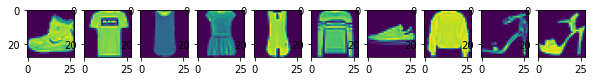

[9. 0. 0. 3. 0. 2. 7. 2. 5. 5.]


In [36]:
plt.figure(figsize=(10,10))
for i in range(0,10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train[i])
plt.show()

print(y_train[0:10])

In [37]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [55]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [57]:
tf.keras.backend.clear_session()
model=Sequential()

model.add(Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Dense(500))
model.add(tf.keras.layers.LeakyReLU())

model.add(Dense(300))
model.add(tf.keras.layers.LeakyReLU())

model.add(Dense(200))
model.add(tf.keras.layers.LeakyReLU())

model.add(Dense(100))
model.add(tf.keras.layers.LeakyReLU())

model.add(Dense(10,activation="softmax"))

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               6

In [58]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=32,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5112 - accuracy: 0.8181 - val_loss: 0.4434 - val_accuracy: 0.8428
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4065 - accuracy: 0.8533 - val_loss: 0.4512 - val_accuracy: 0.8373
Epoch 3/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3773 - accuracy: 0.8625 - val_loss: 0.4003 - val_accuracy: 0.8537
Epoch 4/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3521 - accuracy: 0.8695 - val_loss: 0.3868 - val_accuracy: 0.8626
Epoch 5/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3365 - accuracy: 0.8763 - val_loss: 0.3802 - val_accuracy: 0.8645
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3220 - accuracy: 0.8805 - val_loss: 0.3823 - val_accuracy: 0.8664
Epoch 7/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3070 - accuracy: 0.8865 - val_loss: 0.4025 -